In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 1: Load the dataset
file_path = r'c:\Data\american_bankruptcy.xlsx'
df = pd.read_excel(file_path)
df['year'] = round(df['year'].astype(int), 0)

# Step 2: Recode the 'status_label' so that only the last observation in a panel is 'failed'
# Sort the dataset by company_name and year to ensure the panel is correctly ordered
df = df.sort_values(by=['company_name', 'year'])

# Identify the last observation for each panel
df['is_last'] = df.groupby('company_name')['year'].transform('max') == df['year']

# Recode 'status_label' based on whether it's the last observation
# df['status_label'] = df.apply(lambda row: 'failed' if row['is_last'] else 'alive', axis=1)

df['status_label_2'] = 'alive'
df.loc[(df['is_last']) & (df['status_label'] == 'failed'), 'status_label_2'] = 'failed'

# Step 3: Convert 'status_label' into a boolean called 'bankrupt'
df['bankrupt'] = df['status_label_2'].map({'alive': 0, 'failed': 1})

# Drop the 'is_last' and 'status_label' columns if no longer needed
df = df.drop(columns=['is_last', 'status_label', 'status_label_2'])

In [41]:
print(df[df['company_name'] == 'C_998'])

      company_name  year        X1        X2       X3       X4       X5  \
11886        C_998  1999  1468.808  1583.195   67.649  155.058  216.857   
11887        C_998  2000   574.528  1603.771   63.890   78.755  101.875   
11888        C_998  2001   799.499  1715.677   60.440  110.428  108.408   
11889        C_998  2002   762.905  1703.327   40.811 -115.120  149.848   
11890        C_998  2003   698.527  2208.338   44.504  -42.738   69.485   
11891        C_998  2004   799.923  1633.629   40.293   86.128   72.355   
11892        C_998  2005   993.099  1413.105   44.266  220.780   73.799   
11893        C_998  2006  2140.478  3305.921   61.000  425.696  307.915   
11894        C_998  2007  2757.500  4404.908   95.989  762.091  289.500   
11895        C_998  2008  2216.985  5393.694  126.133  590.782  440.096   
11896        C_998  2009  2357.921  4913.017  157.419  653.700  502.325   
11897        C_998  2010  1285.638  1744.622   76.452  442.358   67.528   
11898        C_998  2011 

In [42]:
bankruptcy_count_by_year = df[df['bankrupt'] == 1].groupby('year').size()
print(bankruptcy_count_by_year)

year
1999     3
2000     7
2001    10
2002    17
2003    29
2004    46
2005    40
2006    51
2007    59
2008    58
2009    23
2010    35
2011    25
2012    26
2013    28
2014    33
2015    33
2016    29
2017    21
2018    36
dtype: int64


In [43]:
# Step 4: Prepare data for LDA and QDA
# Assuming variables X1-X18 are the feature columns
X = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18']]
y = df['bankrupt']

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Perform LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)
y_pred_lda = lda.predict(X)

# Evaluate LDA performance
lda_accuracy = accuracy_score(y, y_pred_lda)
print(f'LDA Accuracy: {lda_accuracy:.2f}')

# Step 6: Perform QDA
qda = QuadraticDiscriminantAnalysis()
qda.fit(X, y)
y_pred_qda = qda.predict(X)

# Evaluate QDA performance
qda_accuracy = accuracy_score(y, y_pred_qda)
print(f'QDA Accuracy: {qda_accuracy:.2f}')

LDA Accuracy: 0.99
QDA Accuracy: 0.12


C:\Users\esiemsen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


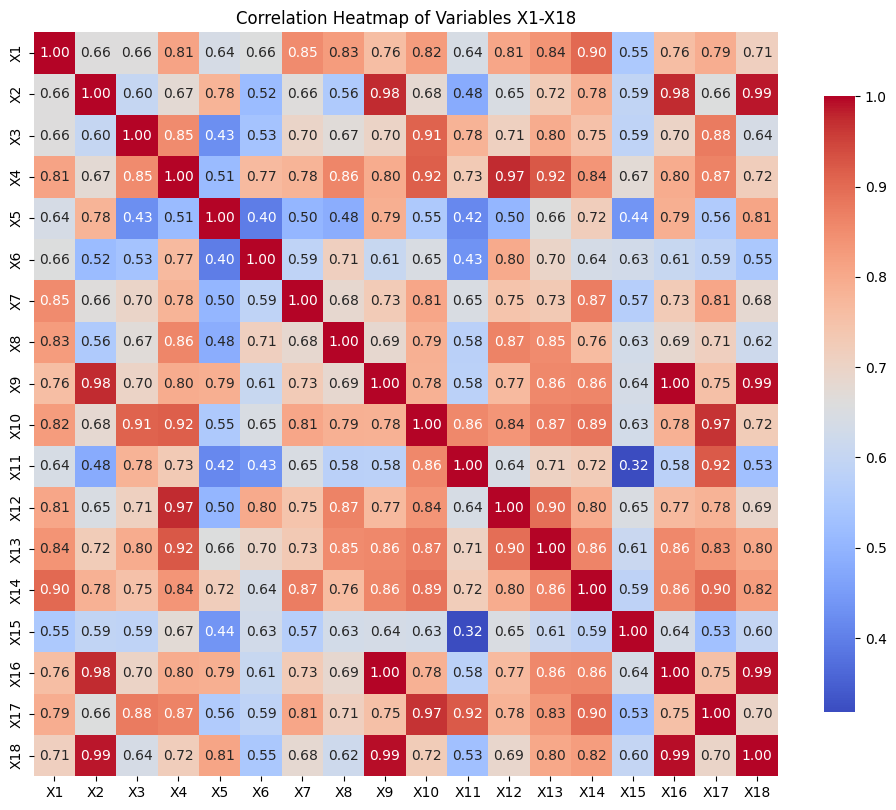

In [44]:
# Calculate the correlation matrix
corr_matrix = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 
                  'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18']].corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={'shrink': .8})

# Customize the plot
plt.title('Correlation Heatmap of Variables X1-X18')
plt.show()